In [ ]:
#pip install pandas scikit-learn matplotlib


In [ ]:
#pip install threadpoolctl==3.1.0

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
data_path = 'path to dataset'  # Change to your file path
data = pd.read_excel(data_path)


In [2]:
data.shape

(299, 63)

In [3]:
data.head()

,0.135031,0.229938,0.307099,0.384259,0.453704,0.513117,0.570988,0.090278,0.154321,0.232253,...,0.508488.1,0.554012.1,0.262346,0.293981,0.341049,0.382716,0.427469,0.466821,0.510802,0.557099
0,0.100309,0.175926,0.218364,0.257716,0.307099,0.345679,0.373457,0.128086,0.174383,0.231481,...,0.417438,0.432870,0.355710,0.378858,0.391204,0.395062,0.406636,0.422068,0.431327,0.442130
1,0.087191,0.165123,0.240741,0.311728,0.344907,0.361883,0.373457,0.097222,0.124228,0.183642,...,0.350309,0.350309,0.384259,0.378858,0.373457,0.368827,0.356481,0.351852,0.347222,0.344907
2,0.084877,0.165895,0.244599,0.281636,0.312500,0.320988,0.314815,0.077160,0.118827,0.172068,...,0.291667,0.271605,0.226852,0.256173,0.284722,0.310957,0.307870,0.303241,0.296296,0.287037
3,0.116512,0.224537,0.327932,0.409722,0.454475,0.476852,0.483025,0.125000,0.131944,0.209105,...,0.381173,0.365741,0.479938,0.474537,0.459105,0.442130,0.435957,0.422840,0.408179,0.388889
4,0.118056,0.227623,0.330247,0.397377,0.418981,0.432870,0.439815,0.145062,0.159722,0.244599,...,0.364969,0.371142,0.457562,0.449074,0.439815,0.428241,0.413580,0.388889,0.366512,0.347222


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0.135031    299 non-null    float64
 1   0.229938    299 non-null    float64
 2   0.307099    299 non-null    float64
 3   0.384259    299 non-null    float64
 4   0.453704    299 non-null    float64
 5   0.513117    299 non-null    float64
 6   0.570988    299 non-null    float64
 7   0.090278    299 non-null    float64
 8   0.154321    299 non-null    float64
 9   0.232253    299 non-null    float64
 10  0.309414    299 non-null    float64
 11  0.381944    299 non-null    float64
 12  0.454475    299 non-null    float64
 13  0.512346    299 non-null    float64
 14  0.573302    299 non-null    float64
 15  0.132716    299 non-null    float64
 16  0.175154    299 non-null    float64
 17  0.243827    299 non-null    float64
 18  0.316358    299 non-null    float64
 19  0.385802    299 non-null    f

C:\Users\juh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\juh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\juh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\juh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

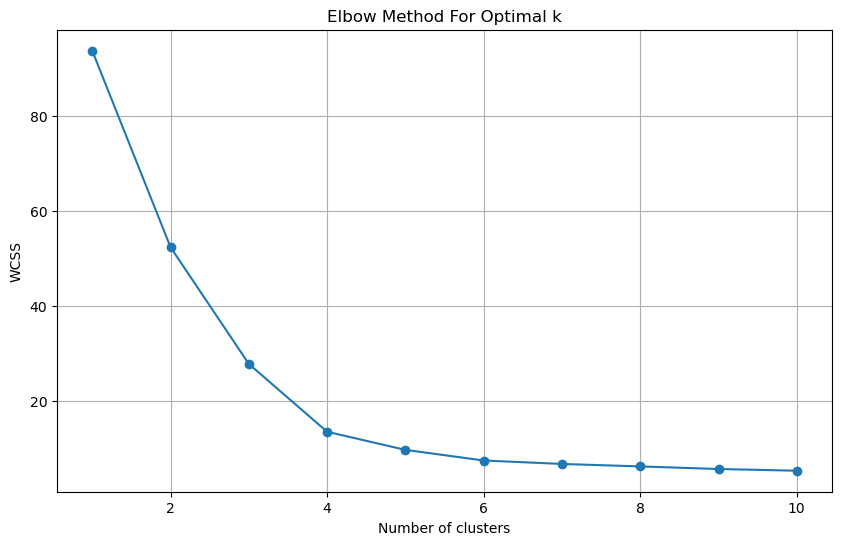

In [5]:
# Function to calculate sum of squared distances for different numbers of clusters (Elbow Method)
def calculate_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for each k
wcss = calculate_wcss(data)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


C:\Users\juh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\juh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


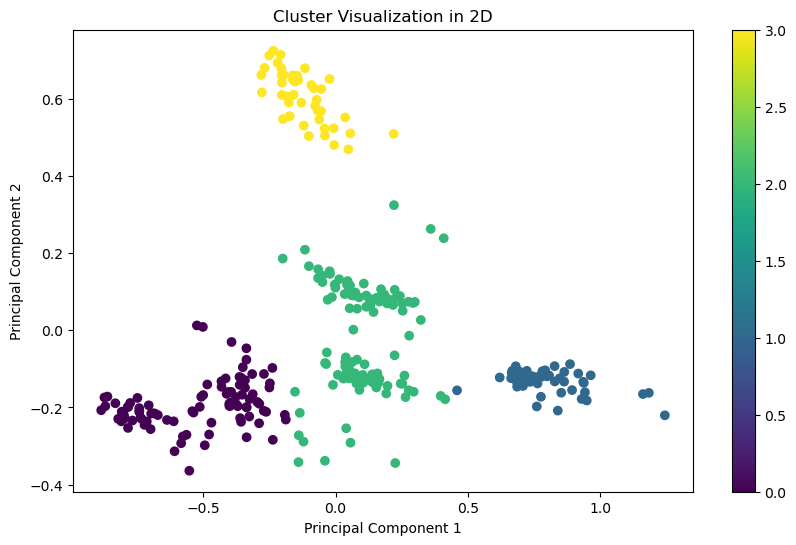

Number of data points in each cluster:
0     91
1     51
2    112
3     45
Name: count, dtype: int64


In [7]:
# Applying K-means with the optimal number of clusters found (3 clusters)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data)

# Visualize the results in 2D using PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.title('Cluster Visualization in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# Count the number of data points in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print("Number of data points in each cluster:")
print(cluster_counts)